### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


C:\Users\Dell\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
import tensorflow as tf
tf.VERSION

'1.13.1'

In [3]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [4]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [5]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [6]:
X.shape

(6, 3)

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

### Building LSTM Model

In [8]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/300
6/6 [==============================] - 4s 671ms/sample - loss: 31508.0938
Epoch 2/300
6/6 [==============================] - 0s 5ms/sample - loss: 31136.9121
Epoch 3/300
6/6 [==============================] - 0s 3ms/sample - loss: 30784.0098
Epoch 4/300
6/6 [==============================] - 0s 2ms/sample - loss: 30420.9766
Epoch 5/300
6/6 [==============================] - 0s 2ms/sample - loss: 30028.7129
Epoch 6/300
6/6 [==============================] - 0s 2ms/sample - loss: 29597.4160
Epoch 7/300
6/6 [==============================] - 0s 2ms/sample - loss: 29114.9141
Epoch 8/300
6/6 [==============================] - 0s 1ms/sample - loss: 28574.9844
Epoch 9/300
6/6 [==============================] - 0s 2ms/sample - loss: 27964.6562
Epoch 10/300
6/6 [==============================] - 0s 1ms/sample - loss: 

Epoch 90/300
6/6 [==============================] - 0s 2ms/sample - loss: 26.4558
Epoch 91/300
6/6 [==============================] - 0s 2ms/sample - loss: 25.2048
Epoch 92/300
6/6 [==============================] - 0s 2ms/sample - loss: 23.8799
Epoch 93/300
6/6 [==============================] - 0s 2ms/sample - loss: 22.6007
Epoch 94/300
6/6 [==============================] - 0s 2ms/sample - loss: 21.4635
Epoch 95/300
6/6 [==============================] - 0s 3ms/sample - loss: 20.5347
Epoch 96/300
6/6 [==============================] - 0s 2ms/sample - loss: 19.8488
Epoch 97/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.4103
Epoch 98/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.1982
Epoch 99/300
6/6 [==============================] - 0s 2ms/sample - loss: 19.1733
Epoch 100/300
6/6 [==============================] - 0s 2ms/sample - loss: 19.2848
Epoch 101/300
6/6 [==============================] - 0s 3ms/sample - loss: 19.4779
Epoch 102/300


Epoch 189/300
6/6 [==============================] - 0s 2ms/sample - loss: 16.5182
Epoch 190/300
6/6 [==============================] - 0s 1ms/sample - loss: 16.4921
Epoch 191/300
6/6 [==============================] - 0s 1ms/sample - loss: 16.4659
Epoch 192/300
6/6 [==============================] - 0s 2ms/sample - loss: 16.4396
Epoch 193/300
6/6 [==============================] - 0s 2ms/sample - loss: 16.4132
Epoch 194/300
6/6 [==============================] - 0s 1ms/sample - loss: 16.3867
Epoch 195/300
6/6 [==============================] - 0s 1ms/sample - loss: 16.3602
Epoch 196/300
6/6 [==============================] - 0s 2ms/sample - loss: 16.3337
Epoch 197/300
6/6 [==============================] - 0s 2ms/sample - loss: 16.3076
Epoch 198/300
6/6 [==============================] - 0s 2ms/sample - loss: 16.2816
Epoch 199/300
6/6 [==============================] - 0s 2ms/sample - loss: 16.2555
Epoch 200/300
6/6 [==============================] - 0s 2ms/sample - loss: 16.2315
Epoc

Epoch 288/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.9187
Epoch 289/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.9076
Epoch 290/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.9028
Epoch 291/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.8951
Epoch 292/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.8846
Epoch 293/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.8714
Epoch 294/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.8589
Epoch 295/300
6/6 [==============================] - 0s 1ms/sample - loss: 14.8505
Epoch 296/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.8415
Epoch 297/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.8322
Epoch 298/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.8227
Epoch 299/300
6/6 [==============================] - 0s 2ms/sample - loss: 14.8129
Epoc

### Predicting For the next 10 data

In [13]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[231.33505]
1 day input [196.         210.         231.33505249]
[196.         210.         231.33505249]
[[[196.        ]
  [210.        ]
  [231.33505249]]]
1 day output [[246.4005]]
[196, 210, 231.33505, 246.4005]
2 day input [210.         231.33505249 246.40049744]
[210.         231.33505249 246.40049744]
[[[210.        ]
  [231.33505249]
  [246.40049744]]]
2 day output [[266.24417]]
[210, 231.33505, 246.4005, 266.24417]
3 day input [231.33505 246.4005  266.24417]
[231.33505 246.4005  266.24417]
[[[231.33505]
  [246.4005 ]
  [266.24417]]]
3 day output [[289.36597]]
[231.33505, 246.4005, 266.24417, 289.36597]
4 day input [246.4005  266.24417 289.36597]
[246.4005  266.24417 289.36597]
[[[246.4005 ]
  [266.24417]
  [289.36597]]]
4 day output [[310.965]]
[246.4005, 266.24417, 289.36597, 310.965]
5 day input [266.24417 289.36597 310.965  ]
[266.24417 289.36597 310.965  ]
[[[266.24417]
  [289.36597]
  [310.965  ]]]
5 day output [[336.51102]]
[266.24417, 289.36597, 310.965, 336.51102]
6 d

In [101]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [102]:
len(timeseries_data)

9

In [84]:
lst_output

[207.60309,
 219.40913,
 232.47244,
 249.33023,
 263.42752,
 279.1716,
 296.92273,
 313.7915,
 332.32684,
 352.21432]

In [75]:
lst

[170, 180, 190]

### Visualizaing The Output

In [38]:
import matplotlib.pyplot as plt

In [89]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

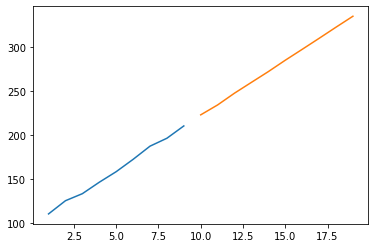

In [103]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
